In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
f = 20 

data = pd.DataFrame()
data['n'] = np.arange(0,211,10)
data['D_re (mm)'] = pd.Series([26.17, 26.10, 26.04, 25.96, 25.89, 25.82,
             25.75, 25.69, 25.62, 25.55, 25.48, 25.42, 25.35, 
             25.28, 25.20, 25.11, 24.99]).reindex(data.index)

data['D_rc (mm)'] = pd.Series([25.22, 25.31, 25.38, 25.46, 25.53, 25.59,
             25.66, 25.72, 25.78, 25.85, np.nan, 25.98, 26.04, 
             26.12, 26.18, 26.24, 26.31, 26.37, 26.44, 26.52, 
             26.58, 26.65]).reindex(data.index)


data['ΔD_re (mm)'] = data.loc[0,'D_re (mm)'] - data['D_re (mm)']
data['ΔD_rc (mm)'] = - data.loc[0,'D_rc (mm)'] + data['D_rc (mm)']

N, _ = data.shape
data = data.drop(index=0)

data

,n,D_re (mm),D_rc (mm),ΔD_re (mm),ΔD_rc (mm)
1,10,26.10,25.31,0.07,0.09
2,20,26.04,25.38,0.13,0.16
3,30,25.96,25.46,0.21,0.24
4,40,25.89,25.53,0.28,0.31
5,50,25.82,25.59,0.35,0.37
6,60,25.75,25.66,0.42,0.44
7,70,25.69,25.72,0.48,0.50
8,80,25.62,25.78,0.55,0.56
9,90,25.55,25.85,0.62,0.63
10,100,25.48,NaN,0.69,NaN


λ_e = 6.99264705926477e-07
λ_c = 6.852382435425675e-07
mean λ = 6.922514747345223e-07


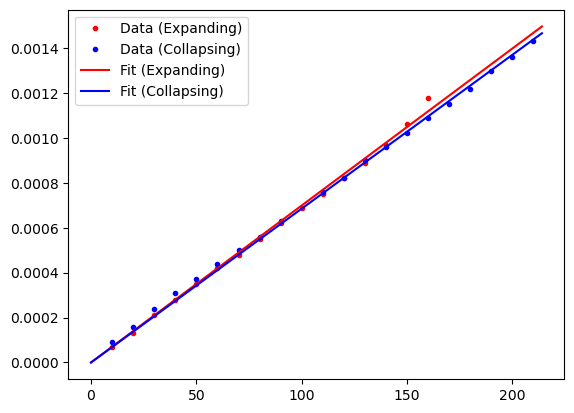

In [3]:
data_e = data[['n', 'ΔD_re (mm)']].dropna()
data_c = data[['n', 'ΔD_rc (mm)']].dropna()

x_re = data_e['n'].to_numpy()
y_re = data_e['ΔD_re (mm)'].to_numpy()*1e-3

x_rc = data_c['n'].to_numpy()
y_rc = data_c['ΔD_rc (mm)'].to_numpy()*1e-3

def formula(n,λ):
    return 0.5*f*λ*n

para, para_cov = curve_fit(formula, x_re, y_re, [600e-9])
λ_e = para[0]
print('λ_e =', λ_e)

para, para_cov = curve_fit(formula, x_rc, y_rc, [600e-9])
λ_c = para[0]
print('λ_c =', λ_c)

print(f'mean λ = {(λ_e+λ_c)/2}')

plt.plot(x_re,y_re,'.', color = "red", label = "Data (Expanding)")
plt.plot(x_rc,y_rc,'.', color = "blue", label = "Data (Collapsing)")

x_reg = np.linspace(0,214,107)
y_reg = formula(x_reg, λ_e)
plt.plot(x_reg,y_reg, '-', color = "red", label = "Fit (Expanding)")
y_reg = formula(x_reg, λ_c)
plt.plot(x_reg,y_reg, '-', color = "blue", label = "Fit (Collapsing)")

plt.legend()
plt.show()

In [4]:
table = data[['n', 'ΔD_re (mm)']].rename(columns={'n': 'x', 
                                               'ΔD_re (mm)':'y'}).dropna()

table['xi^2'] = table['x']**2
table['xiyi'] = table['x']*table['y']

sum_x2 = table['xi^2'].sum()
sum_xy = table['xiyi'].sum()

slope = sum_xy/sum_x2

table['ei'] = table['y'] - slope*table['x']
table['ei^2'] = table['ei']**2

sum_e2 = table['ei^2'].sum()
slope_err = np.sqrt(((1/(N-2))*sum_e2)/sum_x2)

print(f'sum_x2 = {sum_x2}')
print(f'sum_xy = {sum_xy}')
print(f'slope = {slope}, error = {slope_err}')
print(f'sum_e2 = {sum_e2}')

table

sum_x2 = 149600
sum_xy = 1046.1000000000017
slope = 0.006992647058823541, error = 4.284310921163989e-05
sum_e2 = 0.005491911764706144


,x,y,xi^2,xiyi,ei,ei^2
1,10,0.07,100,0.7,0.000074,5.406574e-09
2,20,0.13,400,2.6,-0.009853,9.708045e-05
3,30,0.21,900,6.3,0.000221,4.865917e-08
4,40,0.28,1600,11.2,0.000294,8.650519e-08
5,50,0.35,2500,17.5,0.000368,1.351644e-07
6,60,0.42,3600,25.2,0.000441,1.946367e-07
7,70,0.48,4900,33.6,-0.009485,8.997080e-05
8,80,0.55,6400,44.0,-0.009412,8.858131e-05
9,90,0.62,8100,55.8,-0.009338,8.720264e-05
10,100,0.69,10000,69.0,-0.009265,8.583478e-05


In [5]:
table = data[['n', 'ΔD_rc (mm)']].rename(columns={'n': 'x', 
                                               'ΔD_rc (mm)':'y'}).dropna()

table['xi^2'] = table['x']**2
table['xiyi'] = table['x']*table['y']

sum_x2 = table['xi^2'].sum()
sum_xy = table['xiyi'].sum()

slope = sum_xy/sum_x2

table['ei'] = table['y'] - slope*table['x']
table['ei^2'] = table['ei']**2

sum_e2 = table['ei^2'].sum()
slope_err = np.sqrt(((1/(N-2))*sum_e2)/sum_x2)

print(f'sum_x2 = {sum_x2}')
print(f'sum_xy = {sum_xy}')
print(f'slope = {slope}, error = {slope_err}')
print(f'sum_e2 = {sum_e2}')

table

sum_x2 = 321100
sum_xy = 2200.300000000002
slope = 0.006852382435378393, error = 3.206513787750005e-05
sum_e2 = 0.006602927436936033


,x,y,xi^2,xiyi,ei,ei^2
1,10,0.09,100,0.9,0.021476,4.612261e-04
2,20,0.16,400,3.2,0.022952,5.268104e-04
3,30,0.24,900,7.2,0.034429,1.185323e-03
4,40,0.31,1600,12.4,0.035905,1.289148e-03
5,50,0.37,2500,18.5,0.027381,7.497125e-04
6,60,0.44,3600,26.4,0.028857,8.327296e-04
7,70,0.50,4900,35.0,0.020333,4.134402e-04
8,80,0.56,6400,44.8,0.011809,1.394621e-04
9,90,0.63,8100,56.7,0.013286,1.765067e-04
11,110,0.76,12100,83.6,0.006238,3.891180e-05
